#linear regression


In [3]:
import numpy as np
import matplotlib.pyplot as plt


x_data=[1.0,2.0,3.0]
y_data=[2.0,4.0,6.0]
def forward(x):
    return x*w
def loss(x,y):
    y_pred=forward(x)
    return (y_pred-y)*(y_pred-y)
w_list=[]
mse_list=[]
for w in np.arange(0.0,4.1,0.1):
    print('w=',w)
    l_sum=0
    for x_val,y_val in zip(x_data,y_data):
        y_pred_val=forward(x_val)
        loss_val=loss(x_val,y_val)
        l_sum+=loss_val
        print('\t',x_val,y_val,y_pred_val,loss_val)
    print('MSE=',l_sum/3)
    w_list.append(w)
    mse_list.append(l_sum/3)



w= 0.0
	 1.0 2.0 0.0 4.0
	 2.0 4.0 0.0 16.0
	 3.0 6.0 0.0 36.0
MSE= 18.666666666666668
w= 0.1
	 1.0 2.0 0.1 3.61
	 2.0 4.0 0.2 14.44
	 3.0 6.0 0.30000000000000004 32.49
MSE= 16.846666666666668
w= 0.2
	 1.0 2.0 0.2 3.24
	 2.0 4.0 0.4 12.96
	 3.0 6.0 0.6000000000000001 29.160000000000004
MSE= 15.120000000000003
w= 0.30000000000000004
	 1.0 2.0 0.30000000000000004 2.8899999999999997
	 2.0 4.0 0.6000000000000001 11.559999999999999
	 3.0 6.0 0.9000000000000001 26.009999999999998
MSE= 13.486666666666665
w= 0.4
	 1.0 2.0 0.4 2.5600000000000005
	 2.0 4.0 0.8 10.240000000000002
	 3.0 6.0 1.2000000000000002 23.04
MSE= 11.946666666666667
w= 0.5
	 1.0 2.0 0.5 2.25
	 2.0 4.0 1.0 9.0
	 3.0 6.0 1.5 20.25
MSE= 10.5
w= 0.6000000000000001
	 1.0 2.0 0.6000000000000001 1.9599999999999997
	 2.0 4.0 1.2000000000000002 7.839999999999999
	 3.0 6.0 1.8000000000000003 17.639999999999993
MSE= 9.146666666666663
w= 0.7000000000000001
	 1.0 2.0 0.7000000000000001 1.6899999999999995
	 2.0 4.0 1.4000000000000001 6.75

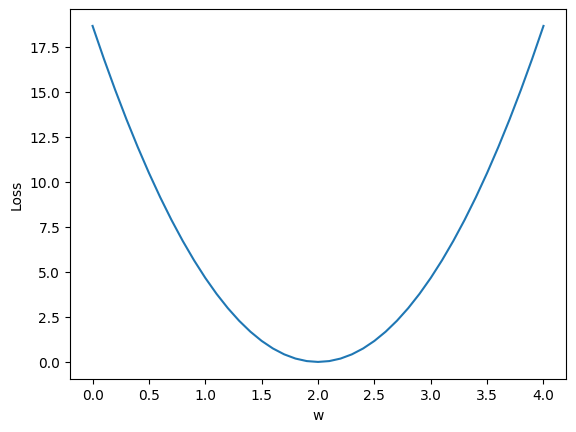

In [8]:

plt.plot(w_list,mse_list)
plt.ylabel('Loss')
plt.xlabel('w')
plt.show()


#gradient descent

In [9]:

x_data=[1.0,2.0,3.0]
y_data=[2.0,4.0,6.0]

w=1.0
w_list=[]
epoch_list=[]
cost_list=[]

def forward(x):
    return x*w

def cost(xs,ys):
    cost=0
    for x,y in zip(x_data,y_data):
        y_pred=forward(x)
        cost+=(y_pred-y) **2
    return cost/len(xs)

def gradient(xs,ys):
    grad=0
    for x,y in zip(xs,ys):
        grad+=2*x*(x*w-y)
    return grad/len(xs)

print('predict y before training ',4,forward(4))
for epoch in range (100):
    cost_val=cost(x_data,y_data)
    grad_val=gradient(x_data,y_data)
    w-=0.01*grad_val
    w_list.append(w)
    epoch_list.append(epoch)
    cost_list.append(cost_val)
    print('epoch:',epoch,'w=',w,'loss=',cost_val)
print('predict y after training',4,forward(4))




predict y before training  4 4.0
epoch: 0 w= 1.0933333333333333 loss= 4.666666666666667
epoch: 1 w= 1.1779555555555554 loss= 3.8362074074074086
epoch: 2 w= 1.2546797037037036 loss= 3.1535329869958857
epoch: 3 w= 1.3242429313580246 loss= 2.592344272332262
epoch: 4 w= 1.3873135910979424 loss= 2.1310222071581117
epoch: 5 w= 1.4444976559288012 loss= 1.7517949663820642
epoch: 6 w= 1.4963445413754464 loss= 1.440053319920117
epoch: 7 w= 1.5433523841804047 loss= 1.1837878313441108
epoch: 8 w= 1.5859728283235668 loss= 0.9731262101573632
epoch: 9 w= 1.6246153643467005 loss= 0.7999529948031382
epoch: 10 w= 1.659651263674342 loss= 0.6575969151946154
epoch: 11 w= 1.6914171457314033 loss= 0.5405738908195378
epoch: 12 w= 1.7202182121298057 loss= 0.44437576375991855
epoch: 13 w= 1.7463311789976905 loss= 0.365296627844598
epoch: 14 w= 1.7700069356245727 loss= 0.3002900634939416
epoch: 15 w= 1.7914729549662791 loss= 0.2468517784170642
epoch: 16 w= 1.8109354791694263 loss= 0.2029231330489788
epoch: 17 w=

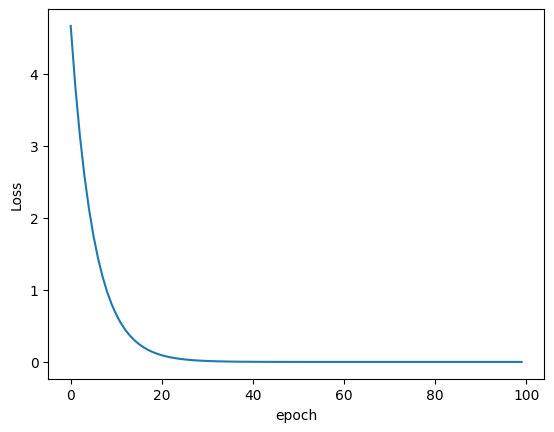

In [10]:


plt.plot(epoch_list,cost_list)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()



#stochastic gradient descent
不能并行处理数据

In [1]:
x_data=[1.0,2.0,3.0,4.0]
y_data=[2.0,4.0,6.0,8.0]

w=1.0
epoch_list=[]
loss_list=[]
w_list=[]
def forward(x):
    return x*w

def loss(x,y):
    y_pred=forward(x)
    return (y_pred-y)**2

def gradient(x,y):
    return 2*x*(x*w-y)

print('pridict before training :',4,forward(4))

for epoch in range(100):
    for x,y in zip(x_data,y_data):
        grad=gradient(x,y)
        w=w-0.01*grad
        print('\tgrad:',x,y,grad)
        l=loss(x,y)
    w_list.append(w)
    epoch_list.append(epoch)
    print('progress:',epoch,'w=',w,'loss=',l)
print('predict after training ',4,forward(4))





pridict before training : 4 4.0
	grad: 1.0 2.0 -2.0
	grad: 2.0 4.0 -7.84
	grad: 3.0 6.0 -16.2288
	grad: 4.0 8.0 -23.657984
progress: 0 w= 1.4972678400000001 loss= 4.043833995172248
	grad: 1.0 2.0 -1.0054643199999997
	grad: 2.0 4.0 -3.9414201343999995
	grad: 3.0 6.0 -8.158739678208
	grad: 4.0 8.0 -11.89362939756544
progress: 1 w= 1.7472603753017344 loss= 1.0220370862819224
	grad: 1.0 2.0 -0.5054792493965312
	grad: 2.0 4.0 -1.981478657634403
	grad: 3.0 6.0 -4.101660821303216
	grad: 4.0 8.0 -5.979309997277575
progress: 2 w= 1.8729396625578516 loss= 0.2583092696146019
	grad: 1.0 2.0 -0.2541206748842968
	grad: 2.0 4.0 -0.9961530455464427
	grad: 3.0 6.0 -2.062036804281137
	grad: 4.0 8.0 -3.0059914302409467
progress: 3 w= 1.9361226821073798 loss= 0.06528498785847768
	grad: 1.0 2.0 -0.12775463578524038
	grad: 2.0 4.0 -0.5007981722781416
	grad: 3.0 6.0 -1.036652216615753
	grad: 4.0 8.0 -1.5112085646665179
progress: 4 w= 1.9678868180008364 loss= 0.016500103329782457
	grad: 1.0 2.0 -0.06422636399

ValueError: x and y must have same first dimension, but have shapes (100,) and (41,)

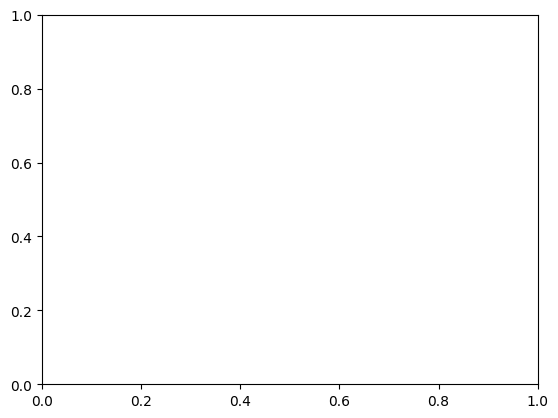

In [4]:
plt.plot(epoch_list,w_list)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()


# back propagation

In [6]:
import torch 

x_data=[1.0,2.0,3.0]
y_data=[2.0,4.0,6.0]

w=torch.Tensor([1.0])
w.requires_grad=True


因为w是tensor，所以w*x后，x自动转换为tensor

In [7]:
def forward(x):
    return w*x

def loss(x,y):
    y_pred=forward(x)
    return (y_pred-y)**2
    

w是一个tensor，其中有data和grad，grad也是一个tensor，取grad的值也需要.data
每次计算后需要清空grad的数据，避免防止影响下次计算

In [8]:
print('predict before training',4,forward(4).item())

for epoch in range(100):
    for x,y in zip(x_data,y_data):
        l=loss(x,y)
        l.backward()
        print('\tgrad:',x,y,w.grad.item())
        w.data=w.data-0.01*w.grad.data
        
        w.grad.data.zero_()
    print('progress',epoch,l.item())
print('pridict after training:',4,forward(4).item())


predict before training 4 4.0
	grad: 1.0 2.0 -2.0
	grad: 2.0 4.0 -7.840000152587891
	grad: 3.0 6.0 -16.228801727294922
progress 0 7.315943717956543
	grad: 1.0 2.0 -1.478623867034912
	grad: 2.0 4.0 -5.796205520629883
	grad: 3.0 6.0 -11.998146057128906
progress 1 3.9987640380859375
	grad: 1.0 2.0 -1.0931644439697266
	grad: 2.0 4.0 -4.285204887390137
	grad: 3.0 6.0 -8.870372772216797
progress 2 2.1856532096862793
	grad: 1.0 2.0 -0.8081896305084229
	grad: 2.0 4.0 -3.1681032180786133
	grad: 3.0 6.0 -6.557973861694336
progress 3 1.1946394443511963
	grad: 1.0 2.0 -0.5975041389465332
	grad: 2.0 4.0 -2.3422164916992188
	grad: 3.0 6.0 -4.848389625549316
progress 4 0.6529689431190491
	grad: 1.0 2.0 -0.4417421817779541
	grad: 2.0 4.0 -1.7316293716430664
	grad: 3.0 6.0 -3.58447265625
progress 5 0.35690122842788696
	grad: 1.0 2.0 -0.3265852928161621
	grad: 2.0 4.0 -1.2802143096923828
	grad: 3.0 6.0 -2.650045394897461
progress 6 0.195076122879982
	grad: 1.0 2.0 -0.24144840240478516
	grad: 2.0 4.0 -0.

# pytorch linear regression

optimizer:SGD

In [33]:
import torch

x_data=torch.Tensor([[1.0],[2.0],[3.0]])
y_data=torch.Tensor([[2.0],[4.0],[6.0]])

class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel,self).__init__()
        self.linear=torch.nn.Linear(1,1)

    def forward(self,x):
        y_pred=self.linear(x)
        return y_pred
model =LinearModel()

criterion=torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in range(1000):
    y_pred=model (x_data)
    loss=criterion(y_pred,y_data)
    print(epoch,loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print('w=',model.linear.weight.item())
print('b=',model.linear.bias.item())

x_test=torch.Tensor([4.0])
y_test=model(x_test)
print('y_pred=',y_test.data)


0 66.97140502929688
1 30.19791030883789
2 13.821871757507324
3 6.526283264160156
4 3.273131847381592
5 1.819633960723877
6 1.1673688888549805
7 0.871863842010498
8 0.7352516651153564
9 0.6694471836090088
10 0.635235607624054
11 0.6151595115661621
12 0.6014454364776611
13 0.5906322598457336
14 0.5811787247657776
15 0.5723958611488342
16 0.5639787912368774
17 0.555787980556488
18 0.5477628707885742
19 0.5398731827735901
20 0.5321068167686462
21 0.5244565606117249
22 0.5169178247451782
23 0.5094882249832153
24 0.5021654367446899
25 0.4949483871459961
26 0.4878348112106323
27 0.48082423210144043
28 0.47391414642333984
29 0.46710267663002014
30 0.4603901505470276
31 0.45377326011657715
32 0.44725191593170166
33 0.4408242702484131
34 0.43448930978775024
35 0.42824482917785645
36 0.4220903217792511
37 0.41602399945259094
38 0.4100452661514282
39 0.404151976108551
40 0.398343950510025
41 0.39261895418167114
42 0.3869762420654297
43 0.38141486048698425
44 0.37593352794647217
45 0.37053063511848

optimizer:Adam

In [4]:
import torch

x_data=torch.Tensor([[1.0],[2.0],[3.0]])
y_data=torch.Tensor([[2.0],[4.0],[6.0]])

class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel,self).__init__()
        self.linear=torch.nn.Linear(1,1)

    def forward(self,x):
        y_pred=self.linear(x)
        return y_pred
model =LinearModel()

criterion=torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(1000):
    y_pred=model (x_data)
    loss=criterion(y_pred,y_data)
    print(epoch,loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print('w=',model.linear.weight.item())
print('b=',model.linear.bias.item())

x_test=torch.Tensor([4.0])
y_test=model(x_test)
print('y_pred=',y_test.data.item())


c:\Users\fetishism\.conda\envs\test3_10\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


0 24.295875549316406
1 23.76837921142578
2 23.246837615966797
3 22.731353759765625
4 22.22201919555664
5 21.718935012817383
6 21.22218132019043
7 20.731849670410156
8 20.248004913330078
9 19.770740509033203
10 19.30010986328125
11 18.836185455322266
12 18.37902069091797
13 17.928678512573242
14 17.48519515991211
15 17.04861831665039
16 16.618986129760742
17 16.19632339477539
18 15.780657768249512
19 15.37200927734375
20 14.970389366149902
21 14.5758056640625
22 14.188264846801758
23 13.807758331298828
24 13.434284210205078
25 13.06782341003418
26 12.708358764648438
27 12.35586929321289
28 12.01032829284668
29 11.671695709228516
30 11.339941024780273
31 11.015024185180664
32 10.69689655303955
33 10.385513305664062
34 10.080818176269531
35 9.782756805419922
36 9.491273880004883
37 9.206303596496582
38 8.927783966064453
39 8.655643463134766
40 8.389814376831055
41 8.130227088928223
42 7.876804828643799
43 7.6294708251953125
44 7.388147354125977
45 7.152754783630371
46 6.923213481903076
47

# logistic regression

In [23]:
import torch.nn.functional as F
import torch
x_data=torch.Tensor([[1.0],[2.0],[3.0]])
y_data=torch.Tensor([[0.0],[0.0],[1.0]])

class LogisticRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionModel,self).__init__()
        self.linear=torch.nn.Linear(1,1)
    def forward(self,x):
            y_pred=F.sigmoid(self.linear(x))
            return y_pred
model=LogisticRegressionModel()

criterion=torch.nn.BCELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in range(10000):
    y_pred=model (x_data)
    loss=criterion(y_pred,y_data)
    print(epoch,loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print('w=',model.linear.weight.item())
print('b=',model.linear.bias.item())

x_test=torch.Tensor([4.0])
y_test=model(x_test)
print('y_pred=',y_test.data.item())


0 2.738696575164795
1 2.731147289276123
2 2.723905086517334
3 2.7169511318206787
4 2.7102670669555664
5 2.7038369178771973
6 2.697643756866455
7 2.6916728019714355
8 2.6859097480773926
9 2.6803407669067383
10 2.6749532222747803
11 2.669735908508301
12 2.6646764278411865
13 2.6597650051116943
14 2.654991626739502
15 2.6503467559814453
16 2.645822286605835
17 2.641409397125244
18 2.637101173400879
19 2.632889986038208
20 2.628770112991333
21 2.624734401702881
22 2.6207778453826904
23 2.6168947219848633
24 2.6130800247192383
25 2.6093292236328125
26 2.605637788772583
27 2.6020021438598633
28 2.598418712615967
29 2.5948832035064697
30 2.591392993927002
31 2.587944507598877
32 2.584536075592041
33 2.5811643600463867
34 2.577826976776123
35 2.574522018432617
36 2.571247100830078
37 2.568000555038452
38 2.5647807121276855
39 2.5615854263305664
40 2.5584139823913574
41 2.5552639961242676
42 2.5521349906921387
43 2.549025535583496
44 2.5459346771240234
45 2.542860507965088
46 2.5398032665252686